##### Prob 1.2
Prob 1.1에서 구현한 Harris detector를 이용해 각 test image에 대한 결과를 window size (3x3, 5x5, 9x9)에 따라 구했다. Window size가 커짐에 따라 corner detect 결과가 흐려지는 것을 확인할 수 있다. Harris detector는 noise에 민감하기 때문에 test image에 노이즈가 있을경우에도 corner detect 에 있어 더 유리하다. Gaussian noise를 적용한 이미지를 detect한 결과 더 선명한 결과를 얻을 수 있었다.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
print("done")

done


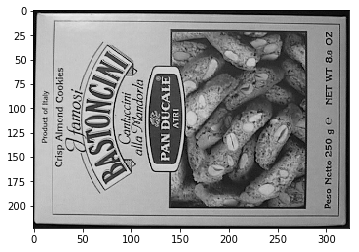

In [110]:
img = cv2.imread('box.pgm',1)
row = img.shape[0]
col = img.shape[1]
# print(row,col)
filt_hor = np.array([[-1,1]])*.01
filt_ver = np.array([[-1],[1]])*.01
# print(filt_hor)
# print(filt_ver)
plt.imshow(img)

In [95]:
Ix = cv2.filter2D(img,-1,filt_hor)
Iy = cv2.filter2D(img,-1,filt_ver)
Ix2 = Ix**2
Iy2 = Iy**2
Ixy = Ix*Iy
win3 = np.ones((3,3))
win5 = np.ones((5,5))
win9 = np.ones((9,9))

In [94]:
# by window 3x3
Ix2_3 = cv2.filter2D(Ix2,-1,win3)
Iy2_3 = cv2.filter2D(Iy2,-1,win3)
Ixy_3 = cv2.filter2D(Ixy,-1,win3)
# by window 5x5
Ix2_5 = cv2.filter2D(Ix2,-1,win5)
Iy2_5 = cv2.filter2D(Iy2,-1,win5);
Ixy_5 = cv2.filter2D(Ixy,-1,win5)
# by window 9x9
Ix2_9 = cv2.filter2D(Ix2,-1,win9)
Iy2_9 = cv2.filter2D(Iy2,-1,win9)
Ixy_9 = cv2.filter2D(Ixy,-1,win9)
# for harmonic
Harmonic3 = np.zeros((row, col,3))
Harmonic5 = np.zeros((row, col,3))
Harmonic9 = np.zeros((row, col,3))

C:\Users\GUR\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\GUR\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\GUR\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


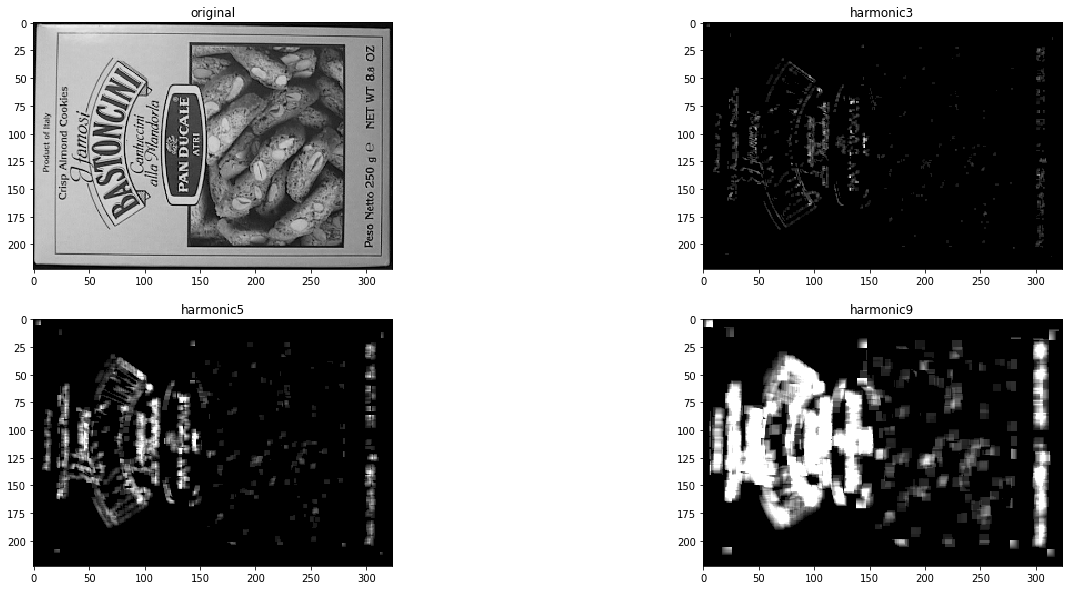

In [92]:


for x in range(row):
    for y in range(col):
        H3 = np.ones((2,2))
        H5 = np.ones((2,2))
        H9 = np.ones((2,2))
        
        H3[0][0] = Ix2_3[x][y][0]
        H3[0][1] = Ixy_3[x][y][0]
        H3[1][0] = Ixy_3[x][y][0]
        H3[1][1] = Iy2_3[x][y][0]


        H5[0][0] = Ix2_5[x][y][0]
        H5[0][1] = Ixy_5[x][y][0]
        H5[1][0] = Ixy_5[x][y][0]
        H5[1][1] = Iy2_5[x][y][0]


        H9[0][0] = Ix2_9[x][y][0]
        H9[0][1] = Ixy_9[x][y][0]
        H9[1][0] = Ixy_9[x][y][0]
        H9[1][1] = Iy2_9[x][y][0]
        for i in range(3):
            Harmonic3[x][y][i] = 0.2*np.linalg.det(H3)/np.trace(H3)
            Harmonic5[x][y][i] = 0.2*np.linalg.det(H5)/np.trace(H5)
            Harmonic9[x][y][i] = 0.2*np.linalg.det(H9)/np.trace(H9)
        

plt.figure(figsize=(22,10)) 
plt.subplot(2,2,1)
plt.title('original')
plt.imshow(img)
plt.subplot(2,2,2)
plt.title('harmonic3')
plt.imshow(Harmonic3)
plt.subplot(2,2,3)
plt.title('harmonic5')
plt.imshow(Harmonic5)
plt.subplot(2,2,4)
plt.title('harmonic9')
plt.imshow(Harmonic9)

        